# Статистика, DS-поток
## Задание S.9

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.**

* Задача 1 &mdash; 70 баллов;
* Задача 2 &mdash; 50 баллов;
* Задача 3 &mdash; 50 баллов;
* Задача 4 &mdash; 10 баллов;
* Задача 5 &mdash; 30 баллов.

Задачи разных типов учитываются в разных рейтингах.

**Важность задач:**

* *высокая:* задачи 1-4;
* *средняя:* задача 5;

Задачи расставлены в том порядке, в котором их наиболее логично выполнять.

In [1]:
# Bot check

# HW_ID: ds_sp9
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

_____
### Задача 1.

Вспомним задачу из предыдущего практического задания. Напомним формулировку.

Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; результаты работы модели на тестовой выборке, где $X_i = 1$, если для $i$-го объекта модель правильно определила класс, а $p$ &mdash; неизвестная вероятность такого события.
Мы хотим проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает, что построенный классификатор выдает рандомный ответ, а первая &mdash; что чаще все же выдает верный ответ.

Укажите равномерно наиболее мощный критерий и определите для него p-value.

На семинаре получено, что $S = \left\{T(x) \geqslant c_\alpha\right\}$, где $T(X) = \sum\limits_{i=1}^n X_i$, является равномерно наиболее мощным критерием для проверки этих гипотез.

**Заметим, что** 

$T(X) \sim Binom(n, p)$

По утверждению с семинара, требуется такое $c_\alpha$, что для максимального $\alpha_0 \leq \alpha$: 

$P_{\theta_0}(T(X) \geq c_\alpha) =  1 - P_{\theta_0}(T(X) \leq c_\alpha)= \alpha_0 \Rightarrow P_{\theta_0}(T(X) \leq c_\alpha) = 1 - \alpha_0 $

откуда ищем через квантиль ($c_\alpha$ - $1-\alpha$ квантиль $Binom(n, p)$, но с доп проверкой на дискретность):
```
c_alpha0 = sps.binom(n = n, p = theta_0).ppf(1 - alpha)

if 1 - sps.binom(n = n, p = theta_0).cdf(c_alpha0) > alpha:
    c_alpha0 += 1
```

Найдем $p_v (p~value)$. Пусть $t$ - реализация статистики $T(X)$. Тогда вероятность получить такое же или более экстремальное значение:

$$p_v = \mathbb P\left(T(x) \geq t \right) = 1 - \mathbb P\left(T(x) < t \right) = 1 - \mathbb P\left(T(x) \leq t - 1 \right) = 1 - F(t - 1)$$

где $F$ - функция распределения $Binom(n, p)$

Проведите несколько экспериментов аналогично предыдущему заданию, дополнив таблицу значениями p-value.

*Замечание:* Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

Вспомогательные функции

In [3]:
def hypothesis_test(n, T, alpha=0.05, theta_0=0.5):
    """
    Тестирует нулевую гипотезу на основе статистики T,
    равной сумме всех предсказаний
    """
    c_alpha0 = sps.binom(n=n, p = theta_0).ppf(1 - alpha)
    if 1 - sps.binom(n = n, p = theta_0).cdf(c_alpha0) > alpha:
        c_alpha0 += 1
    
    reject = int(T_obs >= c_alpha0)
    p_value = 1 - sps.binom(n = n, p = theta_0).cdf(T - 1)

    p_value = str(round(p_value, 2)) if p_value >= 0.01 else f"{p_value:.1e}"
    
    return c_alpha0, reject, p_value

Сами тесты

In [4]:
n_values = [5, 10, 20, 30, 40, 50]
T_values = [0, 5, 15, 25, 35, 45]
alpha = 0.05
results = []

for n, T_obs in zip(n_values, T_values):
    c_alpha, reject_h0, p_value = hypothesis_test(n, T_obs, alpha)
    results.append([n, T_obs, c_alpha, reject_h0, p_value])

df_results = pd.DataFrame(results, columns=["n", "T", "c_alpha", "Отвергаем ли H0", "p_value"])
df_results

,n,T,c_alpha,Отвергаем ли H0,p_value
0,5,0,4.0,0,1.0
1,10,5,8.0,0,0.62
2,20,15,14.0,1,0.02
3,30,25,19.0,1,1.6e-04
4,40,35,25.0,1,6.9e-07
5,50,45,31.0,1,2.1e-09


Представьте себя заказчиком. Каким должно быть истинное значение $p$, чтобы с точки зрения практики можно было бы считать, что связь между черным котом и неудачей имеется?

Если имеется в виду то, при каком значении p-value мы отвергаем нулевую гипотезу - то при $p \leq \alpha$, где $\alpha$ - требуемый уровень значимости. Обычно берем $\alpha = 0.05$ - тогда вероятность ложного "прокраса" - $5\%$

Если про то, какой p в $Be(p)$ считать значимым (против $p=1/2$), то это зависит от контекста задачи. Если это большая бизнесовая задача в крупной компании, то даже небольшое увеличение $p$ может принести прибыль, например 0.55 (а вообще нужно честно посчитать какая прибыль получится)

Если про котов, то можно взять $p \approx 0.7$ - уже сильно больше, чем просто случайность

Традиционный вопрос заказчика &mdash; сколько необходимо провести экспериментов? Заказчик не хочет долго ждать, но хочет, чтобы у вашего критерия была достаточная мощность.

Для начала сгенерируйте 10 выборок для двух случаев:
1. $n=5, p=0.75$;
2. $n=10^5, p=0.51$.

В каждом случае в виде таблицы выведите
* реализацию статистики $T(X)$,
* соответствующее p-value,
* 0/1 &mdash; отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

Вспомогательная функция

In [5]:
def hypothesis_test_experiment(n_values, p_bern_values, theta_0=0.5,
                               alpha=0.05, num_trials=10):
    results = []

    for n, p in zip(n_values, p_bern_values):
        for _ in range(num_trials):
            sample = np.random.binomial(1, p, n)
            T_X = sample.sum()

            p_value = 1 - sps.binom.cdf(T_X - 1, n, theta_0)

            reject_H0 = int(p_value <= alpha)

            p_value = str(round(p_value, 2)) if p_value >= 0.01 else f"{p_value:.1e}"

            results.append({
                'n': n,
                'p': p,
                'T(X)': T_X,
                'p_value': p_value,
                'Отвергаем ли H0': reject_H0
            })

    df_results = pd.DataFrame(results)
    return df_results

Сам эксперимент

In [6]:
n_values = [5, 10**5]
p_bern_values = [0.75, 0.51]
df_results = hypothesis_test_experiment(n_values, p_bern_values)
df_results

,n,p,T(X),p_value,Отвергаем ли H0
0,5,0.75,5,0.03,1
1,5,0.75,5,0.03,1
2,5,0.75,4,0.19,0
3,5,0.75,3,0.5,0
4,5,0.75,2,0.81,0
5,5,0.75,3,0.5,0
6,5,0.75,5,0.03,1
7,5,0.75,4,0.19,0
8,5,0.75,4,0.19,0
9,5,0.75,5,0.03,1


**Вывод:** 

С ростом выборки выросла и мощность метода. Раньше мы не всегда могли доказать статистическую значимость различия между p=0.5 и p=0.75 (а они на самом деле сильно отличаются), а при большой выборке мы можем различить 0.5 и 0.51 причем очень уверенно, $p~value$ << 0.05

Теперь разберемся с тем, как подобрать оптимальный размер выборки.

1. Зафиксируйте значение $p^* > 1/2$, которое на практике обычно называется *минимальным детектируемым эффектом*. Оно должно обладать следующими свойствами.
    - Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть новая модель действительно работает лучше.
    - В противном случае отклонение с практической точки зрения признается несущественным.
2. Для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
3. Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

Мощность выглядит так:

$\beta_s(p) = P_p(X \in S) = P_p(T(X) \geq c_\alpha) =  1 - P_p(T(X) \leq c_\alpha) = 1 - F_p(c_\alpha)$

Где $F_p$ - функция распределения $Binom(n, p)$

Вспомогательная функция.

In [7]:
def power_function(n, theta_0=0.5, alpha=0.05,
                   p_bern_values=np.linspace(0.5, 1, 100)):
    """
    Строит функцию мощности для критерия при различных p > 0.5.
    """

    c_alpha0 = sps.binom(n=n, p = theta_0).ppf(1 - alpha)
    if 1 - sps.binom(n = n, p = theta_0).cdf(c_alpha0) > alpha:
        c_alpha0 += 1

    power = [1 - sps.binom(n=n, p=p).cdf(c_alpha0) for p in p_bern_values]

    return p_bern_values, power

И само построение

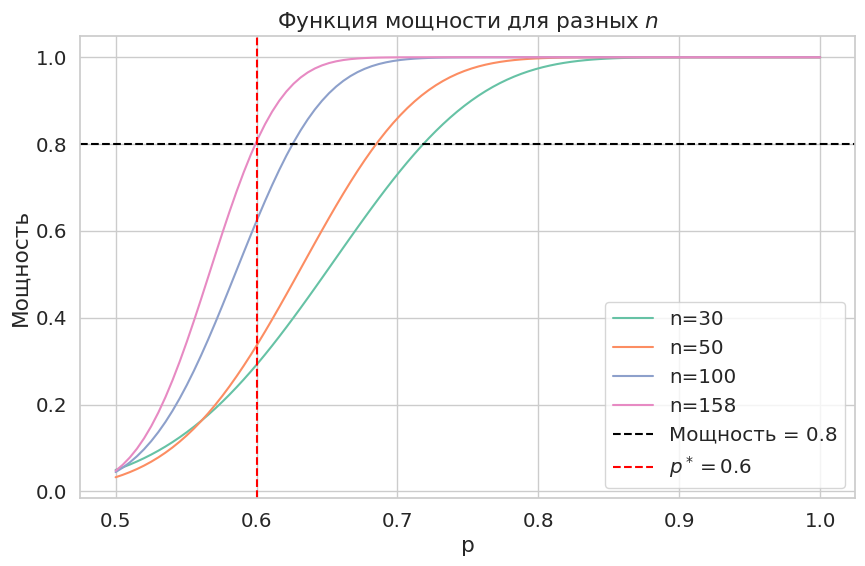

In [8]:
plt.figure(figsize=(10, 6))

for n in [30, 50, 100, 158]:
    p_values, power = power_function(n)
    plt.plot(p_values, power, label=f"n={n}")

plt.axhline(0.8, color="black", linestyle="--", label="Мощность = 0.8")
plt.axvline(x=0.6, color='red', linestyle='--', label=r'$p^* = 0.6$')
plt.xlabel("p")
plt.ylabel("Мощность")
plt.title(r"Функция мощности для разных $n$")
plt.legend()
plt.grid(True)
plt.show()

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$:
 1. $1/2 < p < p^*$;
 2. $p > p^*$.

Если $p = 0.55 < 0.6 = p^*$, то мощность меньше $0.8$:

In [9]:
n_values = [158]
p_bern_values = [0.55]
df_results = hypothesis_test_experiment(n_values, p_bern_values)
df_results

,n,p,T(X),p_value,Отвергаем ли H0
0,158,0.55,83,0.29,0
1,158,0.55,73,0.85,0
2,158,0.55,91,0.03,1
3,158,0.55,89,0.07,0
4,158,0.55,91,0.03,1
5,158,0.55,90,0.05,1
6,158,0.55,84,0.24,0
7,158,0.55,78,0.59,0
8,158,0.55,85,0.19,0
9,158,0.55,92,0.02,1


Если $p = 0.65 > 0.6 = p^*$, то мощность больше $0.8$:

In [10]:
n_values = [158]
p_bern_values = [0.65]
df_results = hypothesis_test_experiment(n_values, p_bern_values)
df_results

,n,p,T(X),p_value,Отвергаем ли H0
0,158,0.65,101,2.9e-04,1
1,158,0.65,106,1.0e-05,1
2,158,0.65,93,0.02,1
3,158,0.65,103,8.3e-05,1
4,158,0.65,98,1.6e-03,1
5,158,0.65,96,4.2e-03,1
6,158,0.65,92,0.02,1
7,158,0.65,95,6.7e-03,1
8,158,0.65,99,9.1e-04,1
9,158,0.65,104,4.3e-05,1


**Вывод:**

Больше выборка - больше мощность (что логично, у нас больше информации о распределении)

Больше различие между истинной $p$ выборки и $p_0 = 0.5$ основной гипотезы - больше мощность (что логично, распределения более разные)

Особенность больших выборок - мы детектируем вообще любое изменение, нам следует выбирать какие изменения мы считаем значимыми. Обратно, это знание может помочь нам выбрать размер выборки и не делать ее слишком большой - такой эксперимент будет сложнее поставить

_____
### Задача 2.

Рассмотрим выборку $X = (X_{1}, ..., X_{n}) \sim \mathcal{N}(\theta, 1)$. Проверяются гипотезы $\mathsf{H}_0\colon\ \theta = 0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta\ > 0$.

Выпишите равномерно наиболее мощный критерий, который получен в предыдущем домашнем задании.

Статистика 
$T(X) = \sum_{i=1}^n X_i $, причем  $T(X) \sim\big|_{H_0} \mathcal{N}(0, n)$

РНМК уровня доверия $\alpha$:

$$S(X) = \left\{X~|~T(X) \geq z_\alpha \sqrt n \right\}$$

где $z_\alpha$ - $1 - \alpha$ квантиль $N(0, 1)$


Найдем $p~value$:

$$p(t) = \mathbb P(T(X) \geq t) = 1 - F(t / \sqrt n)$$

где $F$ - функция распределения $\mathcal{N}(0, 1)$

На практике если предполагается, что распределение статистики критерия $T(X)$ одинаково и непрерывно, то перед применением критерия можно проверить его на корректность следующим образом.
1. Генерируется множество искусственных выборок в предположении справедливости $\mathsf{H}_0$.
2. По каждой из выборок вычисляется p-value.
3. По всем p-value строится гистограмма, которая визуально проверяется на равномерность.

В AB-тестировании такая процедура часто носит название *AA-тестирование*.

Проверим корректность нашего критерия. Конечно, у нас случай довольно простой, тут и так "все понятно", но стоит отработать навык проверки.
Проведите эксперимент на $10^6$ выборок размера 100 и постройте гистограмму.

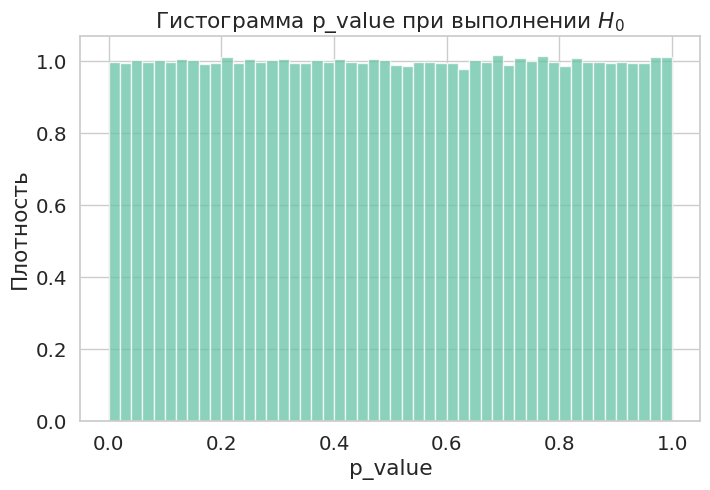

In [11]:
sample_size = 100
sample_count = 10**6

samples = np.random.normal(0, 1, (sample_count, sample_size))
T_X = samples.sum(axis=1)

pvalues = 1 - sps.norm.cdf(T_X / np.sqrt(sample_size))

plt.figure(figsize=(8, 5))
plt.hist(pvalues, bins=50, density=True, alpha=0.75)
plt.xlabel("p_value")
plt.ylabel("Плотность")
plt.title("Гистограмма p_value при выполнении $H_0$")
plt.grid(True)
plt.show()

Получили равномерное распределение, все ок, распределение T(X) одинаково (по единственному значению $\theta$)

Как известно, критерий не меняется при рассмотрении сложной основной гипотезы $\mathsf{H}_0\colon\ \theta \leqslant 0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta\ > 0$.

Повторите эксперимент для истинного $\theta=-0.1$.

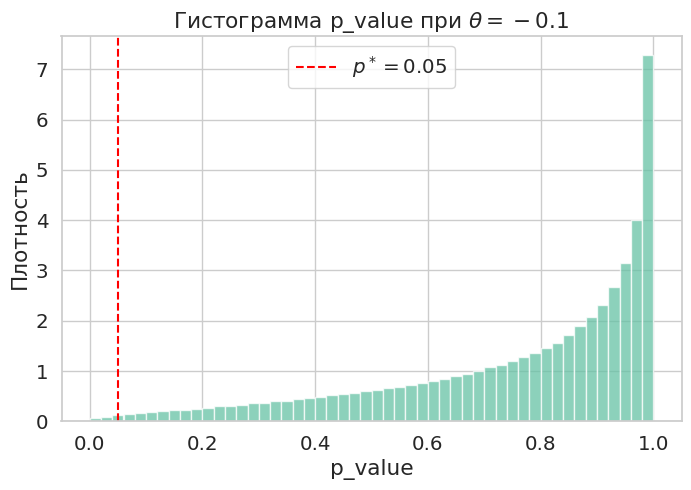

In [12]:
samples = np.random.normal(-0.1, 1, (sample_count, sample_size))
T_X = samples.sum(axis=1)

pvalues = 1 - sps.norm.cdf(T_X / np.sqrt(sample_size))

plt.figure(figsize=(8, 5))
plt.hist(pvalues, bins=50, density=True, alpha=0.75)
plt.xlabel("p_value")
plt.ylabel("Плотность")
plt.title("Гистограмма p_value при $\\theta = -0.1$")
plt.axvline(x=0.05, color='red', linestyle='--', label=r'$p^* = 0.05$')
plt.legend()
plt.grid(True)
plt.show()

*Замечание.* Подобный эффект все равно не дает оснований говорить об уверенности $\mathsf{H}_0$, поскольку критерий может быть недостаточно мощным.

In [13]:
np.mean(pvalues < 0.05)

0.004111

Теперь распределение не равномерное. Что логично, распределение $T(X)$ зависит от $\theta$, ведь теперь $T(X) \sim\big|_{\theta} \mathcal{N}(\theta n, n)$. Однако оно съехало вправо, и ошибка первого рода (при этом $\theta$) (то есть вероятного того, что p-value будет меньше 0.05, а выше посчитана оценка по этой выборке) только уменьшилась - критерий все равно остался корректным (супремум по ошибкам первого рода действительно 0.05)

Проверьте, как ведет себя p-value для альтернативы, рассмотрев истинную $\theta=0.1$.

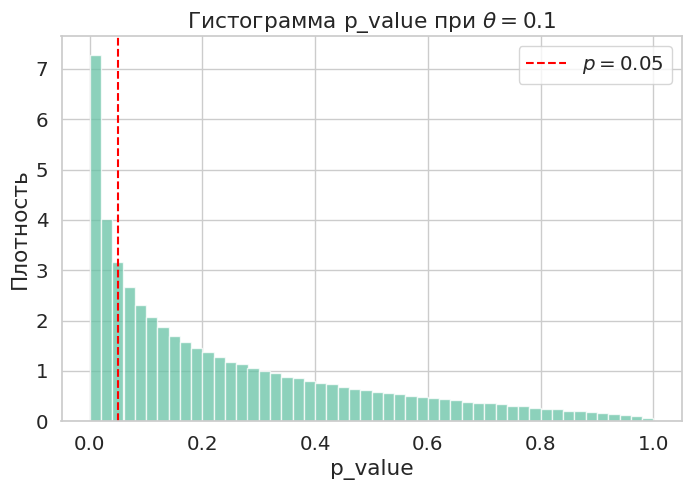

In [14]:
samples = np.random.normal(0.1, 1, (sample_count, sample_size))
T_X = samples.sum(axis=1)

pvalues = 1 - sps.norm.cdf(T_X / np.sqrt(sample_size))

plt.figure(figsize=(8, 5))
plt.hist(pvalues, bins=50, density=True, alpha=0.75)
plt.xlabel("p_value")
plt.ylabel("Плотность")
plt.title("Гистограмма p_value при $\\theta = 0.1$")
plt.axvline(x=0.05, color='red', linestyle='--', label=r'$p = 0.05$')
plt.legend()
plt.grid(True)
plt.show()

Чему соответствует доля случаев, в которых p-value меньше 0.05?

Это будет оценка вероятности того, что p-value < 0.05, то есть оценка мощности при данном $\theta$

In [15]:
np.mean(pvalues < 0.05)

0.259187

**Вывод:** 

1) Не всегда $p(T(X))$ распределена равномерно, даже если критерий корректный (в смысле ошибка первого рода действительно меньше требуемого $\alpha$). Необходимо для проверки самого критерия только чтобы доля случаев, когда $p_value < \alpha$ была не больше $\alpha$
2) Такой генерацией можно проверить статистику $T(X)$ на одинаковость и непрерывность
3) Такой генерацией можно оценивать мощности критериев

__________________
### Задача 3.

На лекциях и семинарах были разобраны следующие критерии проверки нормальности:
* Колмогорова;
* Жарка-Бера;
* Шапиро-Уилка.

Cуществует модификация критерия Колмогорова для проверки нормальности — <a href="https://ru.wikipedia.org/wiki/Критерий_Лиллиефорса"> Критерий Лиллиефорса.</a> При решении задачи можете воспользоваться им, например, взяв реализацию из библиотеки `statsmodels`: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html">`statsmodels.stats.diagnostic.lilliefors`</a>, или же применять для конкретной $F_0$ критерий Колмогорова, пример использования которого можно найти в ноутбуке с лекции.

**1.** Данные критерии являются асимптотическими, и их реальное значение уровня значимости может отличаться от желаемого числа $\alpha=0.05$. На семинарах разобран метод оценки реального уровня значимости критерия. Посчитайте реальный уровень значимости этих критериев для размеров выборки от 5 до 100.

*Подсказка:*

In [16]:
max_sample_size = ...
sample_count = ...
is_reject_<критерий> = np.zeros((max_sample_size, sample_count))

for i in tqdm(range(max_sample_size)):
    for j in range(sample_count):
        sample = ...
        is_reject_<критерий>[i, j] = ...

SyntaxError: invalid syntax (3913639692.py, line 3)

Ваша реализация:

In [16]:
from scipy.stats import kstest, jarque_bera, shapiro
from statsmodels.stats.diagnostic import lilliefors

alpha = 0.05
max_sample_size = 100
sample_count = 15000

is_reject_ks = np.zeros((max_sample_size + 1, sample_count))
is_reject_jarque = np.zeros((max_sample_size + 1, sample_count))
is_reject_shapiro = np.zeros((max_sample_size + 1, sample_count))
is_reject_lilliefors = np.zeros((max_sample_size + 1, sample_count))


for sample_size in tqdm(range(5, max_sample_size + 1)):
    samples = np.random.normal(0, 1, size=(sample_count, sample_size))
    
    for i in range(sample_count):
        # Критерий Колмогорова
        ks_stat, ks_pvalue = kstest(samples[i], 'norm')
        is_reject_ks[sample_size, i] = ks_pvalue < alpha
        
        # Критерий Жарка-Бера
        jb_stat, jb_pvalue = jarque_bera(samples[i])
        is_reject_jarque[sample_size, i] = jb_pvalue < alpha
        
        # Критерий Шапиро-Уилка
        shapiro_stat, shapiro_pvalue = shapiro(samples[i])
        is_reject_shapiro[sample_size, i] = shapiro_pvalue < alpha
        
        # Критерий Лиллиефорса
        lilliefors_stat, lilliefors_pvalue = lilliefors(samples[i])
        is_reject_lilliefors[sample_size, i] = lilliefors_pvalue < alpha

real_level_ks = np.mean(is_reject_ks, axis=-1)[5:]
real_level_jarque = np.mean(is_reject_jarque, axis=-1)[5:]
real_level_shapiro = np.mean(is_reject_shapiro, axis=-1)[5:]
real_level_lilliefors = np.mean(is_reject_lilliefors, axis=-1)[5:]

  0%|          | 0/96 [00:00<?, ?it/s]

Поясните, почему вы выбрали такое значение `sample_count`.

По сути для каждого размера выборки $n$ мы провели серию из sample_count экспериментов по измерению бернуллиевской случайной величины.  Мы предполагаем, что p около 0.05, хотим доверительный интервал точности 95% достаточно узким, чтобы детектировать разницу в 0.005 - ширины 0.005.

Доверительный интервал имеет вид

$$\hat p \pm z_{0.95} \sqrt{\frac{\hat p(1 - \hat p )}{n}}$$
поэтому по ширине $E$ находим $n$ ($z_k$ - $k$ квантиль $N(0,1)$):

$$n =\frac{z_{0.95}p(1-p)}{E^2}$$


In [17]:
Z = 1.96
p = 0.05
E = 0.005

n = (Z**2 * p * (1 - p)) / E**2
n

7299.04

Если реальное значение $p$ окажуется чуть больше, то потребуется чуть больший размер $n$. Размер взял с запасом

Нарисуйте на одном графике зависимость реального уровня значимости от размера выборки для каждого критерия. Пунктиром отметьте уровень 0.05. Не забудьте добавить легенду и подписать оси.

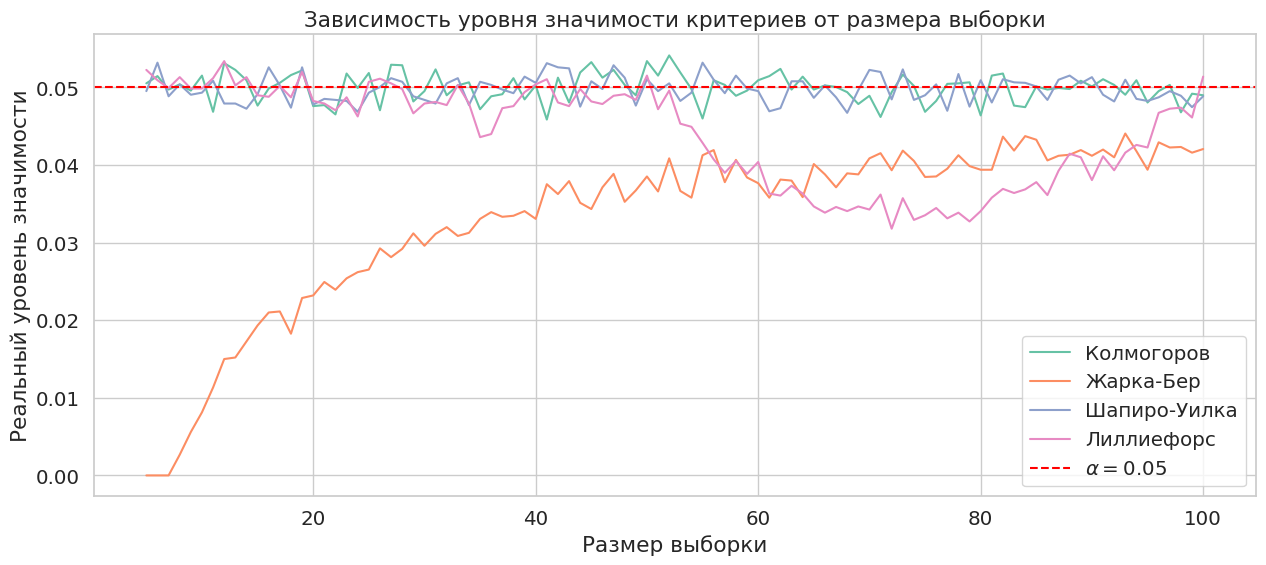

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(range(5, max_sample_size + 1), real_level_ks, label='Колмогоров')
plt.plot(range(5, max_sample_size + 1), real_level_jarque,
         label='Жарка-Бер')
plt.plot(range(5, max_sample_size + 1), real_level_shapiro,
         label='Шапиро-Уилка')
plt.plot(range(5, max_sample_size + 1), real_level_lilliefors,
         label='Лиллиефорс')
plt.axhline(y=alpha, color='r', linestyle='--', label='$\\alpha = 0.05$')
plt.title('Зависимость уровня значимости критериев от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Реальный уровень значимости')
plt.legend()
plt.grid(True)
plt.show()

Какой можно сделать вывод?

Настоящий уровень значимости критерия может отличатся, работают они в требуемом режиме только ассимптотически. Однако для размера выборки $\geq 5$ ни один из этих методов не показал выход за требуемую значимость в $0.05$, они остаются корректными.

Однако, на меньших размерах выборки (до ~60) Жарка-Бер занижает уровень значимости (от чего страдает мощность), а Лилиефорс - на размерах около 60-85

(на графике выше различие в 0.005 значимое)

**2.** Аналогичным образом можно вычислять мощность критерия. Вычислите мощности критериев для размеров выборки от 5 до 100, если альтернативная гипотеза заключается в том, что выборка имеет стандартное распределение Коши. Иначе говоря, для критерия $S$ надо приближенно посчитать $\beta_S(\mathsf{P})$, где $\mathsf{P}$ — стандартное распределение Коши.

Нарисуйте на одном графике зависимость мощности критерия от размера выборки для каждого критерия. Не забудьте добавить легенду и подписать оси.


In [19]:
alpha = 0.05
max_sample_size = 100
sample_count = 3000 

power_ks = []
power_jarque = []
power_shapiro = []
power_lilliefors = []

for sample_size in tqdm(range(5, max_sample_size + 1)):
    cauchy_samples = np.random.standard_t(1, size=(sample_count, sample_size))
    reject_ks = 0
    reject_jarque = 0
    reject_shapiro = 0
    reject_lilliefors = 0
    
    for i in range(sample_count):
        # Критерий Колмогорова
        ks_stat, ks_pvalue = kstest(cauchy_samples[i], 'norm')
        if ks_pvalue < alpha:
            reject_ks += 1
        
        # Критерий Жарка-Бера
        jb_stat, jb_pvalue = jarque_bera(cauchy_samples[i])
        if jb_pvalue < alpha:
            reject_jarque += 1
        
        # Критерий Шапиро-Уилка
        shapiro_stat, shapiro_pvalue = shapiro(cauchy_samples[i])
        if shapiro_pvalue < alpha:
            reject_shapiro += 1
        
        # Критерий Лиллиефорса
        lilliefors_stat, lilliefors_pvalue = lilliefors(cauchy_samples[i])
        if lilliefors_pvalue < alpha:
            reject_lilliefors += 1

    power_ks.append(reject_ks / sample_count)
    power_jarque.append(reject_jarque / sample_count)
    power_shapiro.append(reject_shapiro / sample_count)
    power_lilliefors.append(reject_lilliefors / sample_count)

  0%|          | 0/96 [00:00<?, ?it/s]

И сам график

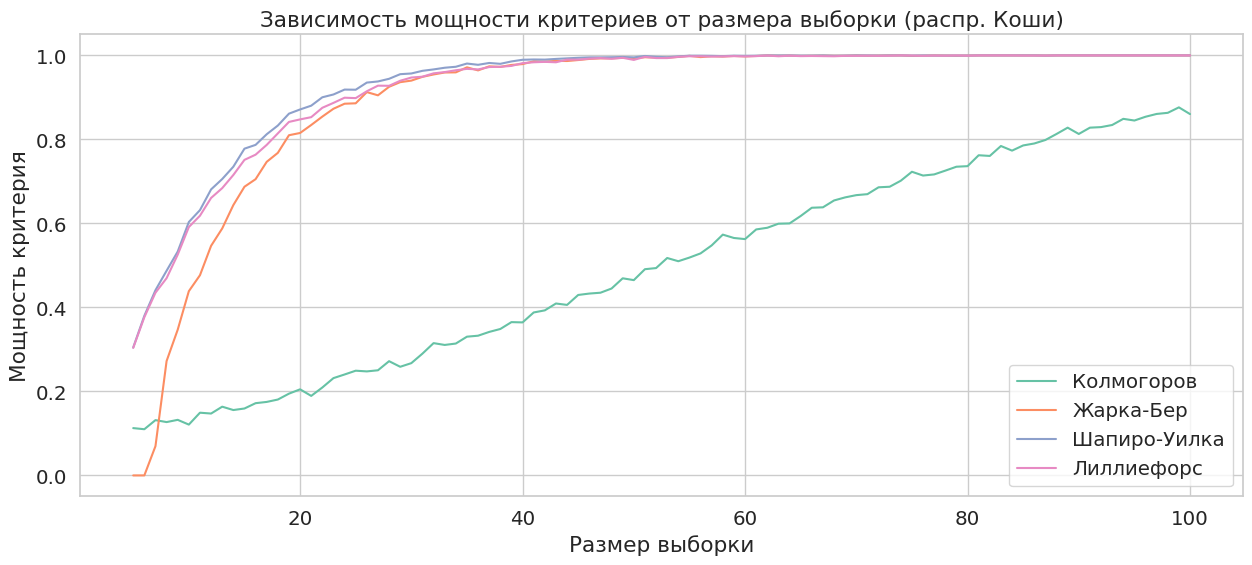

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(range(5, max_sample_size + 1), power_ks,
         label='Колмогоров')
plt.plot(range(5, max_sample_size + 1), power_jarque,
         label='Жарка-Бер')
plt.plot(range(5, max_sample_size + 1), power_shapiro,
         label='Шапиро-Уилка')
plt.plot(range(5, max_sample_size + 1), power_lilliefors,
         label='Лиллиефорс')

plt.title('Зависимость мощности критериев от размера выборки (распр. Коши)')
plt.xlabel('Размер выборки')
plt.ylabel('Мощность критерия')

plt.legend()
plt.grid(True)

plt.show()

Сделайте вывод. Какой критерий является наиболее мощным при данной альтернативе?

С ростом выборки растет и мощность - что ожидаемо, мы имеем больше информации о выборке

Самые мощные методы - Шапиро-Уилка и Лилиефорс с примерно равными результатами

Как и ожидалось, мощность Жарка-Бера страдает на меньших значениях выборки, но дальше все три выравниваются ко значению 1.

Совсем хуже при данной альтернативе показывает себя Колмогоров

Таким образом, надо подбирать критерий под нужную альтернативу.

**3.** Распределение Стьюдента является в некотором смысле обобщением нормального распределения (при бесконечном количестве степеней свободы) и распределения Коши (при одной степени свободы).
Посчитайте приближенно мощности критериев для выборки размера 50 если альтернатива заключается в том, что выборка имеет распределение Стьюдента. Поскольку мощность критерия является функцией от распределения из альтернативной гипотезы, вам нужно посчитать функцию. Посчитайте её значения для целых значений степени свободы от 1 до 10.

Нарисуйте на одном графике зависимость мощности критерия от количества степеней свободы для каждого критерия. Не забудьте добавить легенду и подписать оси.

In [21]:
alpha = 0.05
sample_size = 50
sample_count = 3000 

df_values = range(1, 11)

power_ks = []
power_jarque = []
power_shapiro = []
power_lilliefors = []

for df in tqdm(df_values):
    t_samples = np.random.standard_t(df, size=(sample_count, sample_size))
    
    reject_ks = 0
    reject_jarque = 0
    reject_shapiro = 0
    reject_lilliefors = 0
    
    for i in range(sample_count):
        # Критерий Колмогорова
        ks_stat, ks_pvalue = kstest(t_samples[i], 'norm')
        if ks_pvalue < alpha:
            reject_ks += 1
        
        # Критерий Жарка-Бера
        jb_stat, jb_pvalue = jarque_bera(t_samples[i])
        if jb_pvalue < alpha:
            reject_jarque += 1
        
        # Критерий Шапиро-Уилка
        shapiro_stat, shapiro_pvalue = shapiro(t_samples[i])
        if shapiro_pvalue < alpha:
            reject_shapiro += 1
        
        # Критерий Лиллиефорса
        lilliefors_stat, lilliefors_pvalue = lilliefors(t_samples[i])
        if lilliefors_pvalue < alpha:
            reject_lilliefors += 1
    
    # Вычисление мощности для каждого критерия
    power_ks.append(reject_ks / sample_count)
    power_jarque.append(reject_jarque / sample_count)
    power_shapiro.append(reject_shapiro / sample_count)
    power_lilliefors.append(reject_lilliefors / sample_count)

  0%|          | 0/10 [00:00<?, ?it/s]

И построение графика

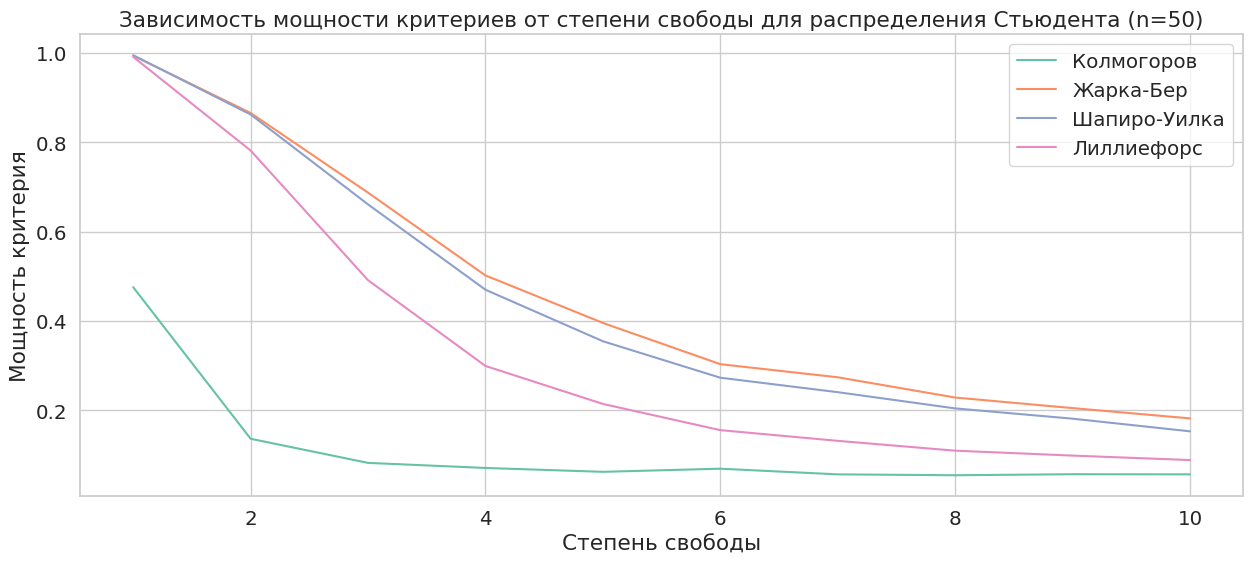

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(df_values, power_ks, label='Колмогоров')
plt.plot(df_values, power_jarque, label='Жарка-Бер')
plt.plot(df_values, power_shapiro, label='Шапиро-Уилка')
plt.plot(df_values, power_lilliefors, label='Лиллиефорс')

plt.title('Зависимость мощности критериев от степени свободы для распределения Стьюдента (n=50)')
plt.xlabel('Степень свободы')
plt.ylabel('Мощность критерия')

plt.legend()
plt.grid(True)

plt.show()

Сделайте вывод относительно мощности критерия при разных распределениях из альтернативы.

Опять, хуже всего показывает себя Колмогоров.

Жарка-Бер и Шапиро-Уилка показывают примерно схожие результаты (выборка уже больше, Жарко-Бер уже не так сильно из-за этого страдает)

Лиллиефорс - чуть хуже.

Для всех критериев с ростом степени свободы уменьшается мощность критерия.

___
### Задача 4.
Студенты периодически отправляют запросы в бот. Иногда бот бывает недоступен,
поэтому студенты с некоторыми интервалами повторяют запросы до тех пор, пока
бот не ответит. Известно, что $52$ запроса дошли с первой попытки, $31$ &mdash; со второй, $3$
&mdash; с третьей, а для доставки еще $5$ запросов потребовалось более $4$ попыток. Верно
ли, что бот получает запросы с вероятностью $\frac{2}{3}$?

**Решение:**

Будем использовать критерий согласия хи-квадрат, $H_0$ - что распределение числа попыток как в условии; $H_1$, что другое, $\alpha = 0.05$

Число попаданий в каждое значение числа доставок

In [23]:
mu_1 = 52
mu_2 = 31
mu_3 = 3
mu_4 = 5
total_requests = mu_1 + mu_2 + mu_3 + mu_4

Вероятности, матожидания и полученные значения

In [24]:
p_base = 2/3
p = np.array([p_base * ((1 - p_base) ** (i - 1)) for i in range(1, 5)])

observed = np.array([mu_1, mu_2, mu_3, mu_4])
expected = np.array(p * total_requests)

Итого

In [25]:
chi_squared_stat = np.sum((observed - expected) ** 2 / expected)

critical_value = sps.chi2.ppf(1 - 0.05, df=4 - 1)

print(f"Статистика хи-квадрата: {round(chi_squared_stat, 2)}")
print(f"Критическое значение: {round(critical_value, 2)}")

if chi_squared_stat > critical_value:
    print("Отвергаем нулевую гипотезу. Распределение другое")

Статистика хи-квадрата: 12.43
Критическое значение: 7.81
Отвергаем нулевую гипотезу. Распределение другое


**Вывод:** 

Распределение другое

Критерий хи квадрат позволяет проверить, лежит ли выборка в каком то распределении или нет

____
### Задача 5.

С помощью критерия хи-квадрат вам нужно проверить, правильно ли `scipy.stats` генерирует случайные величины.

**1.** Реализуйте критерий для генерации выборки $U\{1, ..., 10\}$, аналогично разобранному на семинаре. Тем самым проверьте, что `sps.randint` действительно генерирует выборку из равномерного распределения.

Критерий уровня значимости $\alpha$:

$$\{ X: \hat \chi(X) > \chi(X)^2_{9, 1 - \alpha}\}$$

где $$\hat \chi(X)$$ стастистика из критерия хи квадрат. Он применим, потому что мы можем построить разбиение исходного пространства значений $X$

**2.** Проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5.

**Указания**
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления плотности воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код в отдельной ячейке для *конкретной* реализации выборки. Так вам проще реализовать, а нам проще проверять.

**Решение:**

Реализуем первый критерий

In [26]:
size=100000
sample = sps.randint(1, 11).rvs(size=size)

observed_counts = np.unique(sample, return_counts=True)[1]

expected_counts = np.full(10, size / 10)

chi2_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)

df = len(observed_counts) - 1

p_value = 1 - sps.chi2.cdf(chi2_stat, df)

print(f"Статистика хи-квадрат: {round(chi2_stat, 2)}")
print(f"P-value: {round(p_value, 2)}")

Статистика хи-квадрат: 11.27
P-value: 0.26


Значит нулевую гипотезу не отвергаем, все ок. Теперь для распределения Пуассона

In [27]:
size=100000
mu=5
sample = sps.poisson(mu).rvs(size=size)

values, observed_counts = np.unique(sample, return_counts=True)

df = len(observed_counts) - 1

x_values = np.arange(0, np.max(sample) + 1)

expected_counts = sps.poisson(mu).pmf(x_values) * size

# Добавляем нулей
observed_counts_full = np.zeros_like(expected_counts)
observed_counts_full[values] = observed_counts

chi2_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)

p_value = 1 - sps.chi2.cdf(chi2_stat, df)

print(f"Статистика хи-квадрат: {round(chi2_stat, 2)}")
print(f"P-value: {round(p_value, 2)}")

Статистика хи-квадрат: 13.88
P-value: 0.74


Значит опять нулевую гипотезы не отвергаем, все ок

**Вывод:**

Критерий согласованности хи-квадрат легко реализовать, и он позволяет проверить соответствие довольно широкому классу распределений, что очень хорошо